# Find the duplicates

***

After analyzing various options, our strategy has been to face this task relying on a data structure that we already know about and adapting it to our purposes. More specifically we implemented a **Bloom Filter-look-like** algorithm to fetch all the duplicate passwords stored in the txt file. This particular space-efficient data structure is used to test whether an element is a member of a set. The price we pay for efficiency is that it is probabilistic in nature meaning that there might be some **False Positive** results. False positive means, it might tell that given passwords are duplicate even if they actually aren't.


The important features of this data structure are:
+ Ability of representing a set with an arbitrarily **large** number of elements.
+ Adding an element never fails. However, the false positive rate increases steadily as elements are added until all bits in the array are set to 1, at which point all queries produce a positive result.
+ Never generates false negative result, i.e., telling you that a password does not have duplicates when it actually has.

### How does it work?

1. The algorithm is based on a huge **bit array** all set to zero. The bigger the bit array is, the less false positives will be detected.


2. When checking a password, the **hash function** converts the string to a very big number. In our case we use *MurmurHash3* as hash function. 


3. After computing the hashes k times with k different seeds (but always the same k different seeds for every other password), with the modulo operation (the rest of the division by the size of the bitarray) the result are three indexes i1 i2 i3.


4. If all three the indexes are already set to 1, it means that the password has already processed and checked so the password that we are checking rapresents a duplicate **or** a false positive, otherwise the indexes will be set to 1 meaning that the password is unique.

***

### Example

Suppose we want to check wether the password **'Orange'** is a duplicate or not. And suppose we have initialized the bitarray to **10** (the lenght of the bit array should be way more big but we choose 10 for explenation purposes and also the result values of the hash functions are not real, they are just for explanation purposes). We will have:

In [62]:
pw1 = 'Orange'
size_bit_array = 10
    
#hash_it(pw1, 0) % size_bit_array = 3
#hash_it(pw1, 1) % size_bit_array = 7
#hash_it(pw1, 2) % size_bit_array = 4

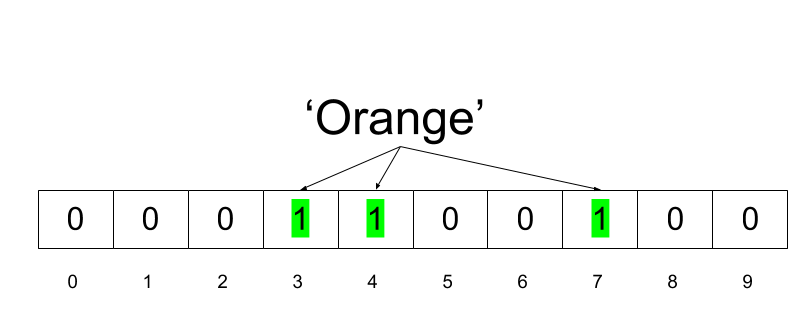

In [63]:
from IPython.display import Image
Image(filename='img/Orange.png')

When scanning other passwords of our set we will verify if another password already exists in the data structure simply repeating the steps again and checking if the indexes are already set to 1. In this case the password is a duplicate or a probable false positive.
So let's say now we check another word, **'Apple'**. We'll get:

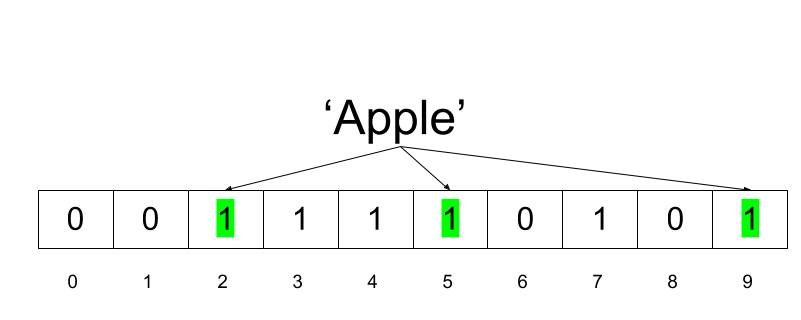

In [67]:
pw2 = 'Apple'
size_bit_array = 10

#hash_it(pw2, 0) % size_bit_array = 2
#hash_it(pw2, 1) % size_bit_array = 5
#hash_it(pw2, 2) % size_bit_array = 9



Image(filename='img/Apple.png')

But if we will check a password such as **'Gpple'**. There is high probability that the hash functions will generate the same values generated for **'Apple'**, obaining the same indexes. In this case the password will be considered a false positive.

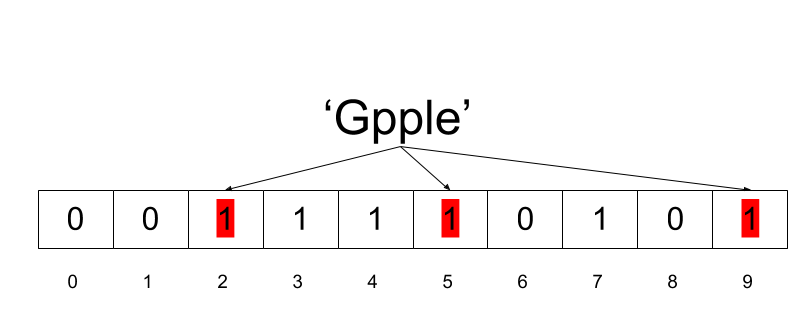

In [65]:
pw3 = 'Gpple'
size_bit_array = 10

#hash_it(pw3, 0) % size_bit_array = 2
#hash_it(pw3, 1) % size_bit_array = 5
#hash_it(pw3, 2) % size_bit_array = 9

Image(filename='img/Gpple.png')



So, because bits at calculated indices are already set by some other item, the data structure erroneously claim that 'Gpple' is present and generating a **false positive result**. We can control the probability of getting a false positive by controlling the size of the bit array. **More space means fewer false positives**. If we want to decrease probability of false positive result, we have to use more number of hash functions and larger bit array. This would add latency in addition of item and checking membership.

***


# Usage
The following chunks rapresent a possible usage of our implementation of the algorithm.

In [1]:
from bloomfilter import BloomFilter 

n = 110000000 #number of items to add (number of passwords)
p = 0.05 #false positive probability 

bloomf = BloomFilter(n,p) 
print("Size of bit array:{}".format(bloomf.size)) 
print("False positive Probability:{}".format(bloomf.fp_prob)) 
print("Number of hash functions:{}".format(bloomf.hash_count)) 

filename = 'passwords2.txt'
passwords = []
dup = 0
c = 0

with open(filename) as file:
    for line in file:
        pw = line.strip()
        if bloomf.check(pw):
            dup += 1
        bloomf.add(pw)

print("The number of exact duplicate passwords is: {}".format(dup))

Size of bit array:685874665
False positive Probability:0.05
Number of hash functions:4
The number of exact duplicate passwords is: 6142956
